# *Exploratory Data Analysis* **(EDA)** for Order Dispatched

In [2]:
# importing necessay libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns

c:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Reading cleaned CSV of dispatched orders
df= pd.read_csv("orders dispatched.csv")

In [4]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


In [5]:
# Checking for Data Types
df.dtypes

invoice no        int64
stock code       object
description      object
quantity          int64
invoice date     object
unit price      float64
customer ID       int64
country          object
total price     float64
dtype: object

Making necessary changes to the data types

In [6]:
df["invoice date"]= df["invoice date"].astype("datetime64[ns]")

In [7]:
df.dtypes

invoice no               int64
stock code              object
description             object
quantity                 int64
invoice date    datetime64[ns]
unit price             float64
customer ID              int64
country                 object
total price            float64
dtype: object

Data Types is Perfect!

# Let's check for NaN values 

In [8]:
df.isna().sum()

invoice no      0
stock code      0
description     0
quantity        0
invoice date    0
unit price      0
customer ID     0
country         0
total price     0
dtype: int64

**Excellent !** we dont have any NaN values in our "df"

*lets drop duplicates!*

In [9]:
df.shape

(396507, 9)

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(391319, 9)

we see that, there is a drop in rows ! which means we removed Duplicates from the df

In [12]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


# **Things to Explore !!!**
        1. Descriptive statistics

        2. Time Based Analysis

        3. Product Analysis

        4. Customer Analysis

        5. Relations and conclusion

# **1. Decriptive Statistics**

In [13]:
df.describe()

,invoice no,quantity,invoice date,unit price,customer ID,total price
count,391319.000000,391319.000000,391319,391319.000000,391319.000000,391319.000000
mean,560592.879260,13.175432,2011-07-10 19:37:34.518027264,2.890469,15294.850201,22.379209
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,549235.000000,2.000000,2011-04-07 11:16:00,1.250000,13969.000000,4.950000
50%,561875.000000,6.000000,2011-07-31 12:05:00,1.950000,15157.000000,11.900000
75%,572062.000000,12.000000,2011-10-20 12:57:00,3.750000,16794.000000,19.800000
max,581587.000000,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,13087.072942,181.875931,NaN,4.375171,1710.157059,311.333932


# conclusion on "Unit Price"

In the unit price column, 75% of the products prices are less than 3.75 pounds, and the max value is 650. which infers that there are very few products with higher price range and 75% of product price are below 3.75, which means the store is selling products with lower unit price!

# Conclusion on "Quantity"

Simillary in the quantity column we see that the 75% of the ordered quantity are < 12 pcs and the max is around 81000,and the is a large difference b/w the mean and standard deviation, which means there where some dulk orders here and there!

In [14]:
df.describe(include= 'object')

,stock code,description,country
count,391319,391319,391319
unique,3661,3873,36
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2023,2016,349167


We have 36 countries in our Data

we see that most of the orders are from the UK!

This shop in UK can have >= 3873 Products to its catalogue!

# list of countries

In [15]:
df["country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# **2. Time Based Analysis**

Let's do some analysis on sales data over a few duration 

<AxesSubplot:title={'center':'Monthly sales Trend'}, xlabel='Month', ylabel='Products sold'>

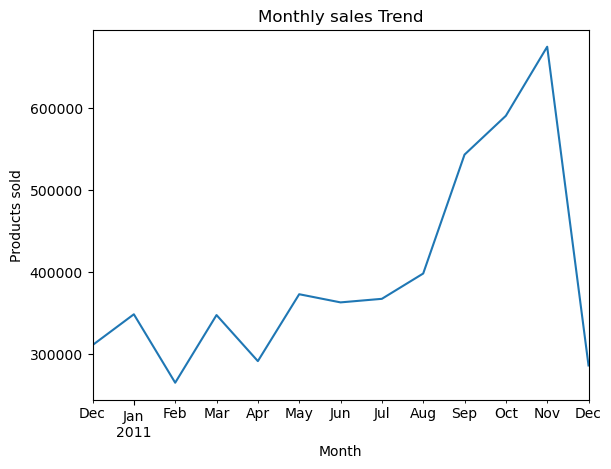

In [16]:
monthly_sales= df.resample("M",on="invoice date")["quantity"].sum()
monthly_sales.plot(kind="line",xlabel="Month",ylabel="Products sold",title="Monthly sales Trend")

we see that the sales are increasing MOM, now lets check on a QOQ basis.

<AxesSubplot:title={'center':'Quaterly sales Trend'}, xlabel='Quater', ylabel='Products sold'>

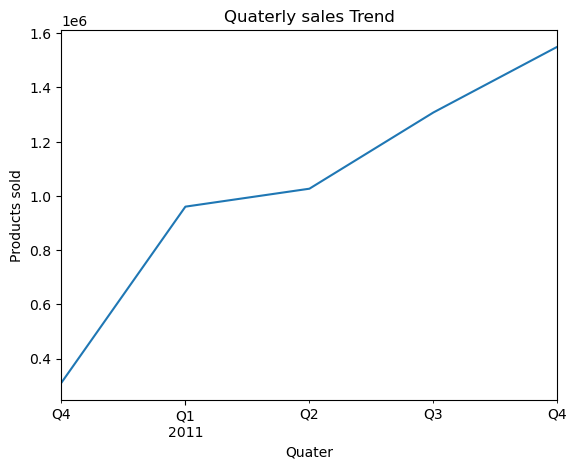

In [17]:
quaterly_sales= df.resample("Q",on="invoice date")["quantity"].sum()
quaterly_sales.plot(kind="line",xlabel="Quater",ylabel="Products sold",title="Quaterly sales Trend")

We see a QOQ improvement in sales! which is **good** for the company :)

# **How is the order trend ?**

<AxesSubplot:title={'center':'Monthly Order Trend'}, xlabel='Month', ylabel='Toatal Order'>

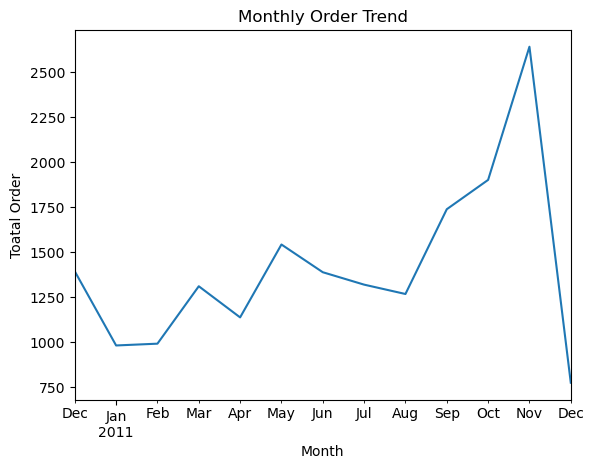

In [56]:
order_trend= df.resample("M",on="invoice date")["invoice no"].nunique()
order_trend.plot(kind="line",xlabel="Month",ylabel="Toatal Order",title="Monthly Order Trend")

<AxesSubplot:title={'center':'Quaterly Order Trend'}, xlabel='Quater', ylabel=' Toatl Order'>

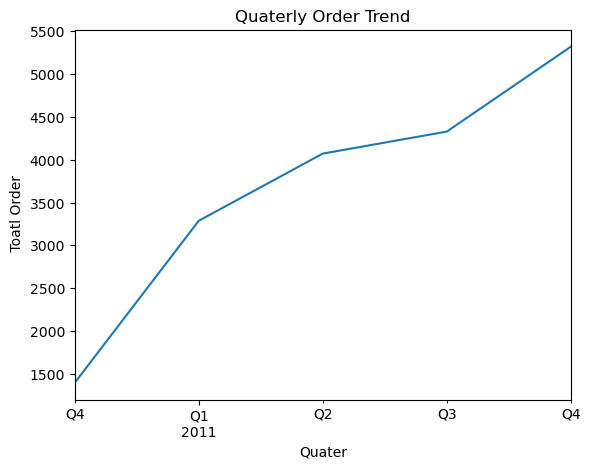

In [19]:
order_trend= df.resample("Q",on="invoice date")["invoice no"].nunique()
order_trend.plot(kind="line",xlabel="Quater",ylabel=" Toatl Order",title="Quaterly Order Trend")


The order quantites have been improving **QOQ** which is a good sign for the company

# what is the **MAX** order value ?


In [20]:
max_order_value= df.groupby(df["invoice no"])["unit price"].sum().reset_index()
max_order_value.columns= ["invoice no","order price"]
max_order_value.sort_values("order price",ascending= False).head(7)

,invoice no,order price
17399,579196,2402.75
18038,580727,2382.28
16123,576339,2301.94
17005,578270,1915.84
14971,573576,1751.26
12434,567656,1712.48
15780,575607,1533.72


We see that the max order value is 2402.75 Pounds

In [21]:
max_order_value.describe()

,invoice no,order price
count,18408.000000,18408.000000
mean,559515.424489,61.445854
std,13048.147734,77.944153
min,536365.000000,0.040000
25%,548332.750000,17.700000
50%,559794.500000,42.500000
75%,570829.250000,80.942500
max,581587.000000,2402.750000


# **3. Product Analysis**

In [22]:
df["description"].describe()

count                                 391319
unique                                  3873
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2016
Name: description, dtype: object

Most occuring or the most ordered product is **"WHITE HANGING HEART T-LIGHT HOLDER"**, which occured **2016 times!**

As said, there is around **3873 products** in this dataset

# What is the costliest product ?

In [23]:
costliest_product = df.sort_values("unit price",ascending= False)
costliest_product.head(5)

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
154835,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,United Kingdom,38970.0
154840,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098,United Kingdom,649.5
31889,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406,United Kingdom,295.0
3708,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145,United Kingdom,295.0
142395,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015,United Kingdom,295.0


 **"PICNIC BASKET WICKER 60 PIECES"** is the costliest product in this catelogue!


# **What is the most ordererd product and its revenue?**

In [24]:
most_ordered_product= df.groupby(df["description"])[["quantity","total price"]].sum()
most_ordered_product = most_ordered_product.sort_values(["quantity","total price"],ascending= False).reset_index()
most_ordered_product.columns=["Product Name","Total Order Quantity","Order Value"]
most_ordered_product.head(10)

,Product Name,Total Order Quantity,Order Value
0,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,13558.41
3,JUMBO BAG RED RETROSPOT,46078,85040.54
4,WHITE HANGING HEART T-LIGHT HOLDER,36706,100392.10
5,ASSORTED COLOUR BIRD ORNAMENT,35263,56413.03
6,PACK OF 72 RETROSPOT CAKE CASES,33670,16381.88
7,POPCORN HOLDER,30919,23417.51
8,RABBIT NIGHT LIGHT,27153,51251.24
9,MINI PAINT SET VINTAGE,26076,16039.24


We see that the **"PAPER CRAFT , LITTLE BIRDIE"** 	has been the most ordered product with a order value of 168469.60 pounds!

Now let see how this **"PAPER CRAFT , LITTLE BIRDIE"** has been order in the given timeframe!

In [25]:
df[df["description"].str.startswith("PAPER CRAFT , LITTLE BIRDIE")]

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
396039,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


Its feels shocking that **"PAPER CRAFT , LITTLE BIRDIE"** has been ordered only once on a bulk deal **:O)**

Let's check on the next product **"MEDIUM CERAMIC TOP STORAGE JAR"**

In [26]:
product_analysis =df[df["description"].str.startswith("MEDIUM CERAMIC TOP STORAGE JAR")]
product_analysis

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
36990,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
127331,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646,Netherlands,99.84
127759,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745,United Kingdom,5.00
128282,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651,United Kingdom,6.25
128406,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2011-05-12 16:52:00,1.25,13601,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
386940,580665,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-12-05 14:06:00,1.04,16684,United Kingdom,99.84
390493,580956,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-06 14:23:00,1.25,17841,United Kingdom,1.25
391114,580997,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-12-06 17:23:00,1.25,15023,United Kingdom,5.00
391828,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984,United Kingdom,2.50


In [27]:
product_analysis.describe()

,invoice no,quantity,invoice date,unit price,customer ID,total price
count,198.000000,198.000000,198,198.000000,198.000000,198.000000
mean,564793.974747,393.515152,2011-08-19 18:24:43.333333248,1.220303,15390.510101,411.195606
min,541431.000000,1.000000,2011-01-18 10:01:00,1.040000,12346.000000,1.250000
25%,556898.250000,4.000000,2011-06-15 13:01:45,1.250000,14096.000000,5.000000
50%,563613.500000,12.000000,2011-08-18 08:50:00,1.250000,15221.500000,15.000000
75%,571995.250000,12.000000,2011-10-20 06:17:00,1.250000,16804.500000,15.000000
max,581476.000000,74215.000000,2011-12-09 08:48:00,1.250000,18272.000000,77183.600000
std,8668.422665,5272.997869,NaN,0.073360,1704.877910,5483.795367


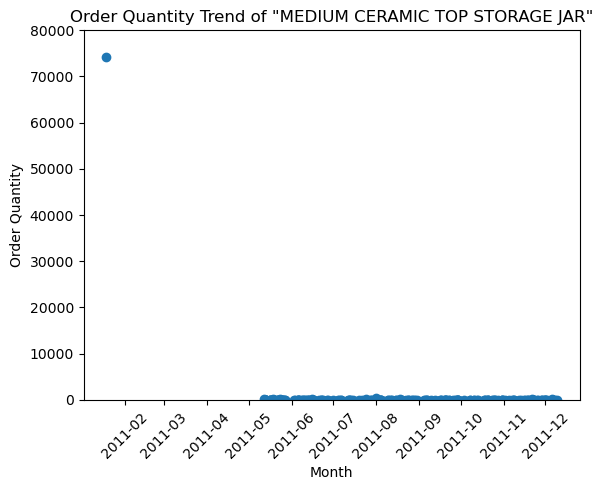

In [28]:
# Assigning Data points
x= product_analysis["invoice date"]
y= product_analysis["quantity"]

# A scatter plot would be appropriate to determine the time frame of the purchase!
plt.scatter(x,y)

# Adding Labels
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.title('Order Quantity Trend of "MEDIUM CERAMIC TOP STORAGE JAR"')

# Changing the limit for clear visibility
plt.ylim(0,80000)

# Rotating the label 
plt.xticks(rotation=45)


plt.show()

We see that only during the first month of 2011 there has been a bulk order of around 75000 and the rest of the sales are from the "May" to "Dec" 2011.

In [29]:
product_analysis_sample= product_analysis.resample("M", on="invoice date")["quantity"].sum().reset_index()
product_analysis_sample

,invoice date,quantity
0,2011-01-31,74215
1,2011-02-28,0
2,2011-03-31,0
3,2011-04-30,0
4,2011-05-31,792
5,2011-06-30,391
6,2011-07-31,718
7,2011-08-31,405
8,2011-09-30,342
9,2011-10-31,235


In [30]:
product_analysis_sample["quantity"].sum()  # Total order quantity 

77916

**Let's plot the monthly sold quantity !**

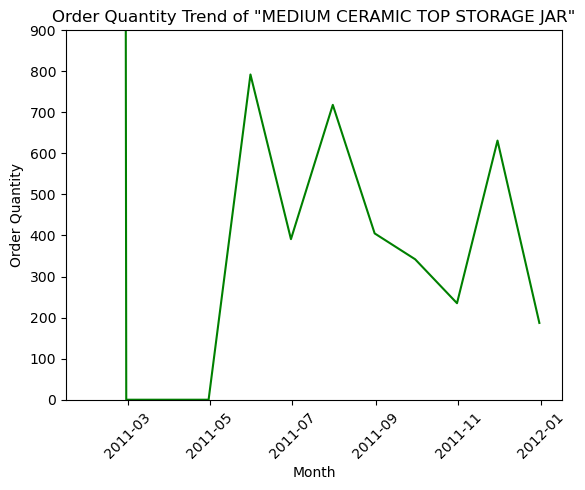

In [31]:
# Assigning Data points
x= product_analysis_sample["invoice date"]
y= product_analysis_sample["quantity"]


# A scatter plot would be appropriate to determine the time frame of the purchase!
plt.plot(x,y, color= "green")

# Adding Labels
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.title('Order Quantity Trend of "MEDIUM CERAMIC TOP STORAGE JAR"')

# Changing the limit for clear visibility
plt.ylim(0,900)   # limiting to ignore the large order quantity(74215) on the jan of 2011

# Rotating the label 
plt.xticks(rotation=45)


plt.show()

# **How many SKU's are sold per day / Month / Quater ?**

In [32]:
sku_per_day= df.resample("D",on="invoice date")[["quantity","total price"]].sum().reset_index()
sku_per_day.columns=["date","sum of SKU sold","total amount"]
sku_per_day

,date,sum of SKU sold,total amount
0,2010-12-01,24107,46085.29
1,2010-12-02,31075,47164.57
2,2010-12-03,11781,23530.93
3,2010-12-04,0,0.00
4,2010-12-05,16163,30913.27
...,...,...,...
369,2011-12-05,37529,55849.48
370,2011-12-06,27707,45429.81
371,2011-12-07,40989,68575.60
372,2011-12-08,27461,50090.70


In [33]:
sku_per_day[["sum of SKU sold","total amount"]].sum().astype("int")

sum of SKU sold    5155797
total amount       8757409
dtype: int32

In [34]:
sku_per_month= df.resample("M",on="invoice date")[["quantity","total price"]].sum().reset_index()
sku_per_month.columns=["Month","sum of SKU sold per Month","total Amount"]
sku_per_month

,Month,sum of SKU sold per Month,total Amount
0,2010-12-31,310647,565890.810
1,2011-01-31,348231,563001.810
2,2011-02-28,264805,442503.990
3,2011-03-31,347298,583957.300
4,2011-04-30,291128,454855.281
5,2011-05-31,372682,659997.090
6,2011-06-30,362736,653764.920
7,2011-07-31,367076,592160.491
8,2011-08-31,397922,637129.660
9,2011-09-30,542845,939652.632


In [35]:
sku_per_month[["sum of SKU sold per Month","total Amount"]].sum().astype("int")

sum of SKU sold per Month    5155797
total Amount                 8757409
dtype: int32

<AxesSubplot:xlabel='Month'>

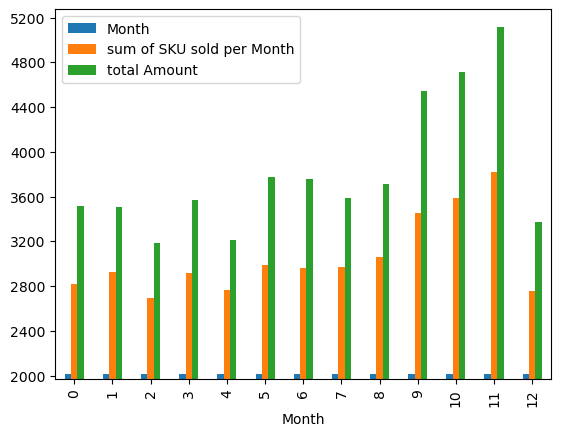

In [36]:
sku_per_month.plot(kind="bar",xlabel="Month")

In [37]:
sku_per_q= df.resample("Q",on="invoice date")[["quantity","total price"]].sum().reset_index()
sku_per_q.columns=["quater","sum of SKU sold per quater","Total Amount"]
sku_per_q

,quater,sum of SKU sold per quater,Total Amount
0,2010-12-31,310647,565890.810
1,2011-03-31,960334,1589463.100
2,2011-06-30,1026546,1768617.291
3,2011-09-30,1307843,2168942.783
4,2011-12-31,1550427,2664495.620


<AxesSubplot:xlabel='quater'>

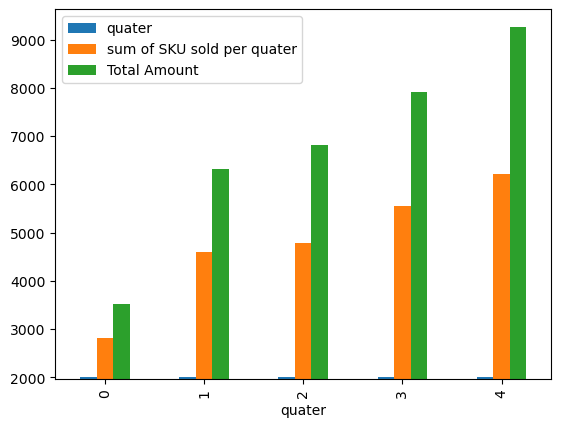

In [38]:
sku_per_q.plot(kind="bar",xlabel='quater')

# **Country wise products sold and its revenue!**

In [39]:
country_wise= df.groupby("country")[["quantity","total price"]].sum().reset_index()
country_wise.columns=["Country","sum of SKU's Sold","Total Revenue"]
country_wise

,Country,sum of SKU's Sold,Total Revenue
0,Australia,84198,139051.450
1,Austria,4844,8742.680
2,Bahrain,260,548.400
3,Belgium,22962,36927.340
4,Brazil,356,1143.600
5,Canada,2762,3115.440
6,Channel Islands,9484,20147.540
7,Cyprus,6338,13167.160
8,Czech Republic,670,786.740
9,Denmark,8193,18211.340


# **country with most sales ?**


In [40]:
most_sales =country_wise.sort_values("sum of SKU's Sold",ascending= False).head(5)
most_sales

,Country,sum of SKU's Sold,Total Revenue
35,United Kingdom,4248859,7258101.434
23,Netherlands,200834,284655.420
16,Ireland,140381,262496.820
13,Germany,118033,205389.100
12,France,110597,183987.940


Clearly the **UK** has the most sales !

# **what % of the order quantity is from the UK ?**

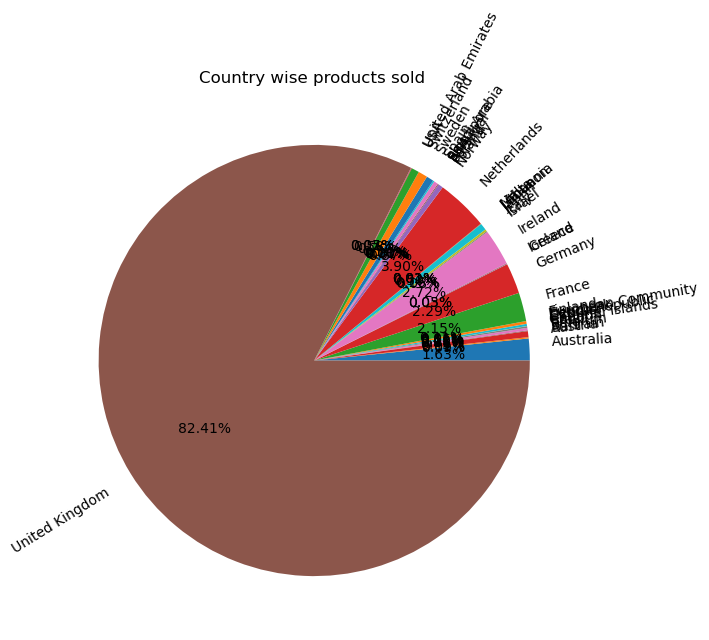

In [42]:
# plotting a pie char !
values= country_wise["sum of SKU's Sold"]
labels= country_wise["Country"]

plt.figure(figsize= (10,7))
 
plt.pie(values, labels= labels, autopct= '%1.2f%%',rotatelabels= True)

plt.title("Country wise products sold ")
plt.show()

# **what % of revenue is from the UK ?**

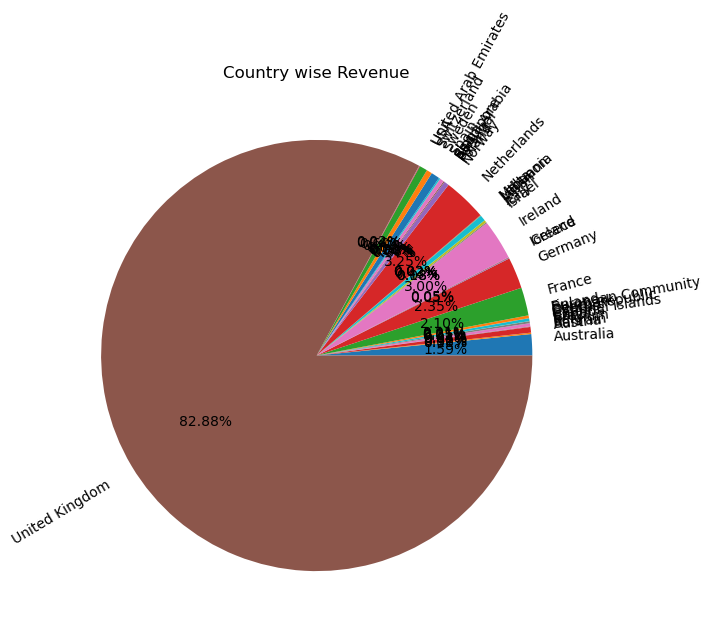

In [43]:
# plotting a pie char !
values= country_wise["Total Revenue"]
labels= country_wise["Country"]

plt.figure(figsize= (10,7))
 
plt.pie(values, labels= labels, autopct= '%1.2f%%',rotatelabels= True)

plt.title("Country wise Revenue")
plt.show()

# **4.Customer Analysis**

# What is the Customer lifetime value (CLTV) ?

In [44]:
customer_cltv= df.groupby("customer ID")[["quantity","total price"]].sum().reset_index()
customer_cltv

,customer ID,quantity,total price
0,12346,74215,77183.60
1,12347,2458,4310.00
2,12348,2332,1437.24
3,12349,630,1457.55
4,12350,196,294.40
...,...,...,...
4330,18280,45,180.60
4331,18281,54,80.82
4332,18282,103,178.05
4333,18283,1355,2039.58


# Top 5 customer with most order quantity ?

In [45]:
customer_cltv.sort_values("quantity",ascending= False).head(5)

,customer ID,quantity,total price
1690,14646,197420,279904.10
3007,16446,80997,168472.50
1880,14911,80488,140945.53
55,12415,77669,125488.77
0,12346,74215,77183.60


# **Top 5 customers with most Revenue?**

In [46]:
customer_cltv.sort_values("total price",ascending= False).head(5)

,customer ID,quantity,total price
1690,14646,197420,279904.10
4198,18102,64124,259657.30
3726,17450,69973,194390.79
3007,16446,80997,168472.50
1880,14911,80488,140945.53


# **What is the Max amount spent on a single order ?**

In [47]:
order_history= df.groupby("customer ID").agg({
    "invoice no": "nunique",
    "total price": "sum"
}).reset_index()
order_history.columns=["customer ID","Total Orders","Total Order value"]
order_history

,customer ID,Total Orders,Total Order value
0,12346,1,77183.60
1,12347,7,4310.00
2,12348,4,1437.24
3,12349,1,1457.55
4,12350,1,294.40
...,...,...,...
4330,18280,1,180.60
4331,18281,1,80.82
4332,18282,2,178.05
4333,18283,16,2039.58


# **Top 5 customers with max order value on a single order !**

In [48]:
order_history.sort_values(["Total Orders","Total Order value"],ascending=[True,False]).head(5)

,customer ID,Total Orders,Total Order value
0,12346,1,77183.60
685,13256,1,10659.00
196,12590,1,9341.26
10,12357,1,6207.67
278,12688,1,4873.81


# **Top 5 Customer with most orders ?**

In [49]:
order_history.sort_values("Total Orders",ascending= False).head(5)

,customer ID,Total Orders,Total Order value
326,12748,206,31650.78
1880,14911,199,140945.53
4008,17841,124,40495.99
562,13089,97,58762.08
2177,15311,91,60632.75


# Lets understand about the order trend of customer 14911 in detail !

In [50]:
unique_customer= df[df["customer ID"] == 14911]
unique_customer

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
1390,536540,22150,3 STRIPEY MICE FELTCRAFT,12,2010-12-01 14:05:00,1.95,14911,Ireland,23.40
1391,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911,Ireland,17.70
1392,536540,85135B,BLUE DRAGONFLY HELICOPTER,2,2010-12-01 14:05:00,7.95,14911,Ireland,15.90
1393,536540,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2010-12-01 14:05:00,9.95,14911,Ireland,59.70
1394,536540,21833,CAMOUFLAGE LED TORCH,12,2010-12-01 14:05:00,1.69,14911,Ireland,20.28
...,...,...,...,...,...,...,...,...,...
395425,581433,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,2011-12-08 15:54:00,1.25,14911,Ireland,30.00
395426,581433,22767,TRIPLE PHOTO FRAME CORNICE,2,2011-12-08 15:54:00,9.95,14911,Ireland,19.90
395427,581433,22472,TV DINNER TRAY DOLLY GIRL,8,2011-12-08 15:54:00,1.95,14911,Ireland,15.60
395428,581433,22473,TV DINNER TRAY VINTAGE PAISLEY,8,2011-12-08 15:54:00,1.95,14911,Ireland,15.60


It is good to see that the customer is from IRELAND, coz this can help in understanding the user order trend!

In [51]:
unique_customer_monthly_data = unique_customer.resample("M",on="invoice date")["invoice no"].nunique()
unique_customer_monthly_data

invoice date
2010-12-31    13
2011-01-31     6
2011-02-28     4
2011-03-31    13
2011-04-30     8
2011-05-31    15
2011-06-30    17
2011-07-31    16
2011-08-31    12
2011-09-30    28
2011-10-31    24
2011-11-30    34
2011-12-31     9
Freq: M, Name: invoice no, dtype: int64

<AxesSubplot:title={'center':'Order trend of user 14911'}, xlabel='Month', ylabel='Total Orders'>

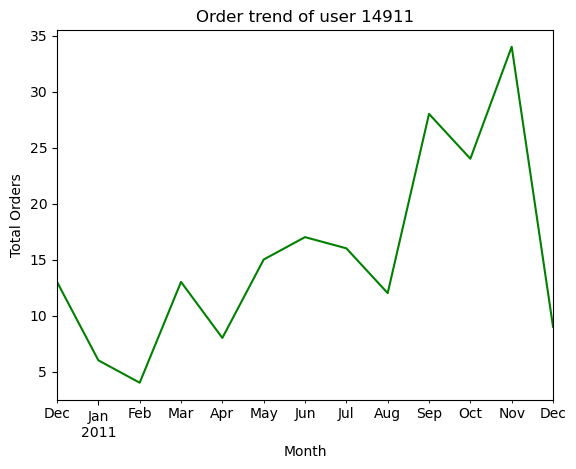

In [52]:
unique_customer_monthly_data.plot(kind="line",x="invoice date",y="invoice no",xlabel="Month",ylabel="Total Orders",title="Order trend of user 14911",color="green")

# **5. Relations and conclusion**

# **Does order quantity determines price ?**

Let's plot a scatter plot with a regression line to get a detailed undestanding of the Dependend variable "Quantity"and Independent(predictor) "Price" in detail.

<AxesSubplot:xlabel='quantity', ylabel='total price'>

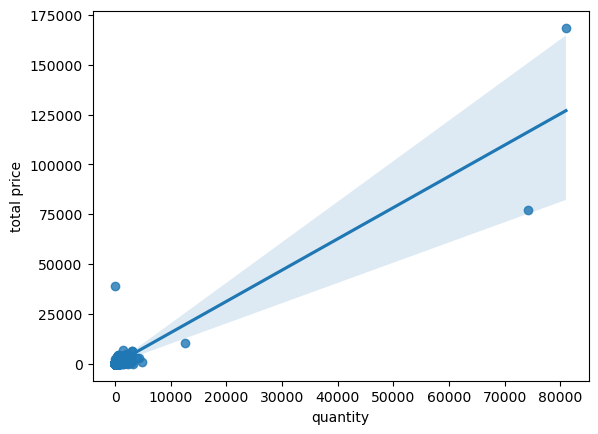

In [53]:
import seaborn as sns
sns.regplot(x="quantity",y="total price",data= df)

We see that there are 4 outliers or which are really very away from the cluster. Lets break down the axis for a clear understanding.

(0.0, 8000.0)

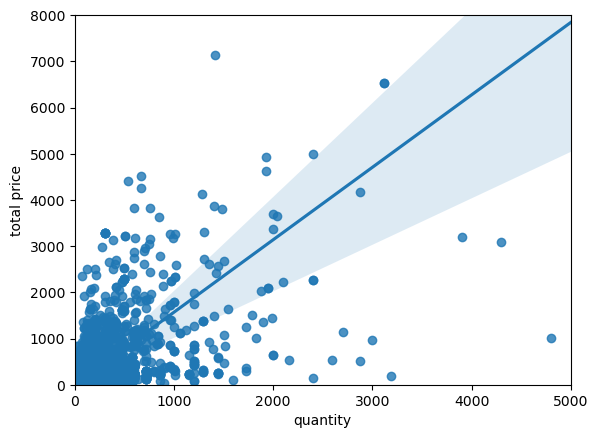

In [54]:
import seaborn as sns
sns.regplot(x="quantity",y="total price",data= df)
plt.xlim(0,5000)
plt.ylim(0,8000)

From the plot we see a positive linear relation between  quantity and price !

# Correlation

In [55]:
correlation= df["quantity"].corr(df["total price"])
correlation

0.9160003791385866

A correlation value of **0.91** indicates a strong positive linear relationship between **"quantity" and "Price"**. It suggests that if the **order quantity increases the total price also increases.** If the order Quantity decreases the Total Price also decreases.

# Conclusion

The company's revenue is directly tied to the quantity of orders it receives. Therefore, to achieve a higher revenue growth, the company should focus on enhancing its sales performance.